In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline

Mapping on WorldMap

In [2]:
#load data
df = pd.read_csv('train.csv')

In [3]:
#connect X-and Y-Axis as geometry
df['geometry'] = df.apply(lambda row: Point(row['X'], row['Y']), axis=1)

In [4]:
#create GeoDataFrame
df_data_show = gpd.GeoDataFrame(df, geometry='geometry')
df_data_show.crs = {'init': 'epsg:4326'}

In [5]:
#Drop all other Attributes
df_data_show = df_data_show.drop(['Dates','Descript','DayOfWeek','PdDistrict', 'Address','Resolution','Descript'], axis = 1)

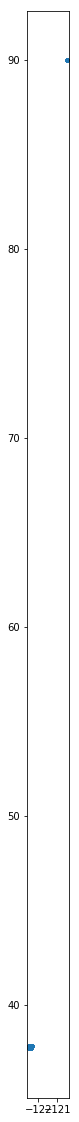

In [6]:
#plot it
df_data_show.plot(figsize=(20,20), marker="o", markersize=8, alpha=0.3)
plt.savefig('Ausreißer_easy.png')
plt.show()

In [7]:
#load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.crs = {'init': 'epsg:4326'}
world = world.rename(columns={'geometry': 'geometry','nhood':'neighborhood_name'}).set_geometry('geometry')

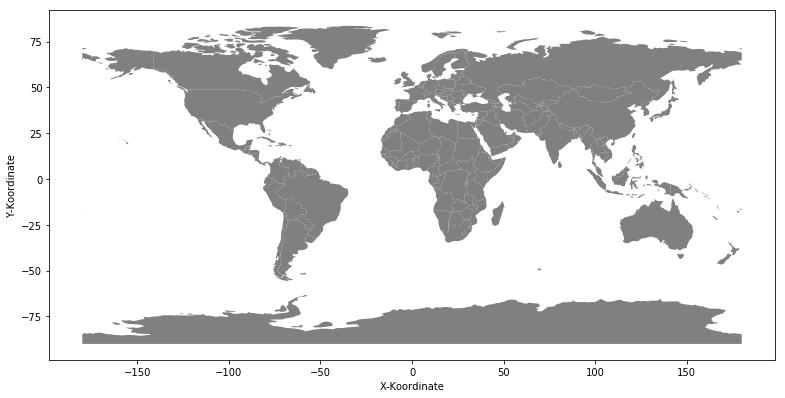

In [8]:
#plot world map
world.plot(figsize=(13,10), color='gray')
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.show()

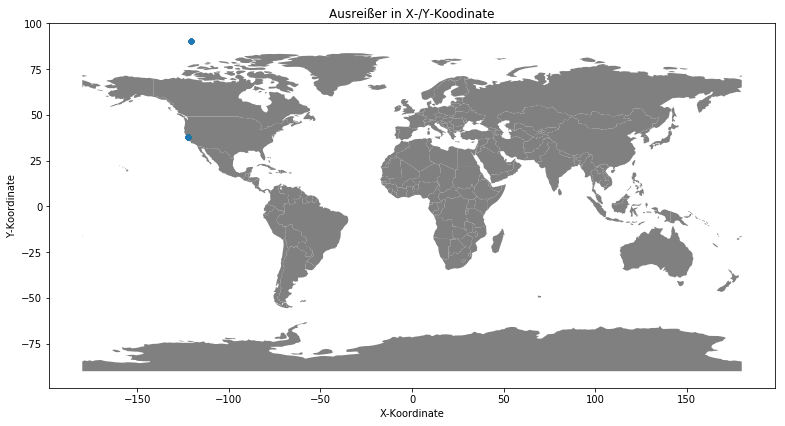

In [9]:
#plot with coordinates
fig, ax = plt.subplots(1, figsize=(13,10))
world_map = world.plot(ax=ax, color='gray')
df_data_show.plot(ax=world_map, marker="o", markersize=20, alpha=0.3)
ax.set_title("Ausreißer in X-/Y-Koodinate")
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.savefig('Ausreißer.png')
plt.show()

Ausreißer Eleminierung / Mapping on SF Map

In [10]:
df_data_sf = df_data_show

In [11]:
#Outliers Elemination
indexCount = df_data_sf[ df_data_sf['Y'] >= 40 ].count

In [12]:
#Outliers Elemination
indexNames = df_data_sf[ df_data_sf['Y'] >= 40 ].index
df_data_sf.drop(indexNames , inplace=True)

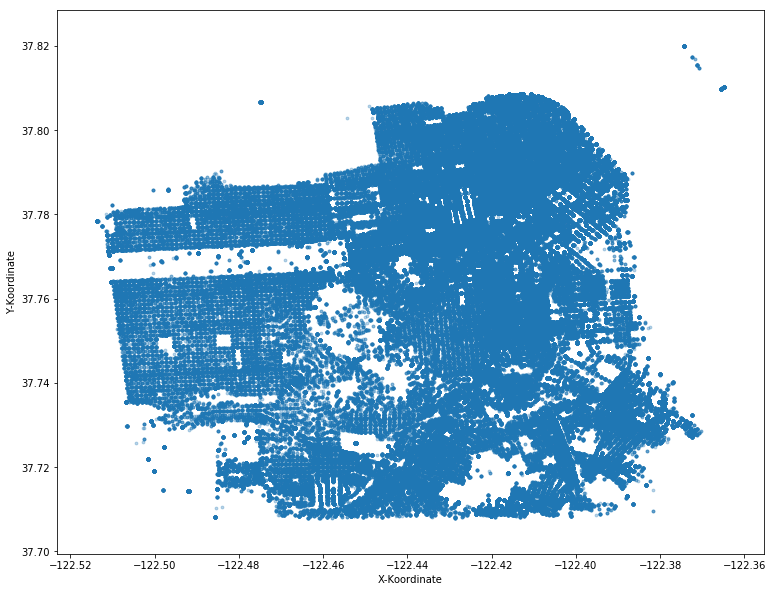

In [13]:
#Plot it raw
df_data_sf.plot(figsize=(13,10), marker="o",  markersize=8,  alpha=0.3)
ax.set_title("Verbrechen in SF")
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.savefig('Point-sfc.png')
plt.show()

In [14]:
#load SF-Map
sf_map = gpd.read_file('san-francisco.geojson')
sf_map.crs = {'init': 'epsg:4326'}
sf_map = sf_map.rename(columns={'geometry': 'geometry','nhood':'neighborhood_name'}).set_geometry('geometry')

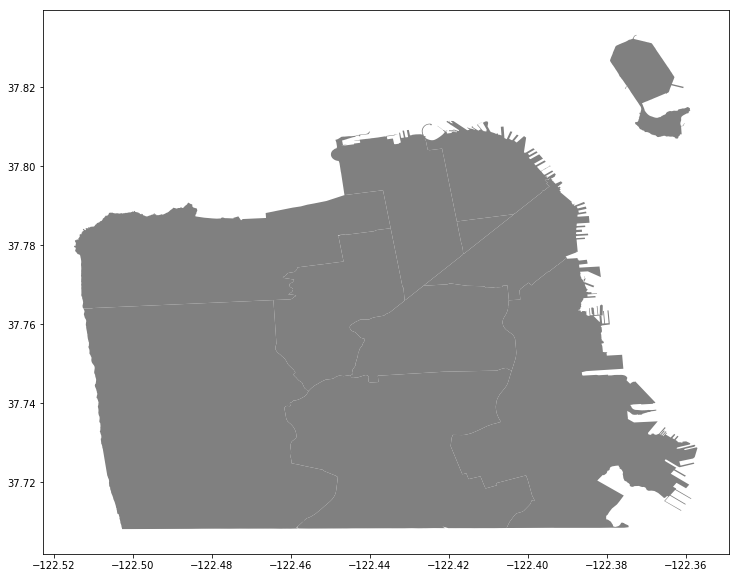

In [15]:
#plot SF-Map
sf_map.plot(figsize=(13,10), color='grey')
plt.show()

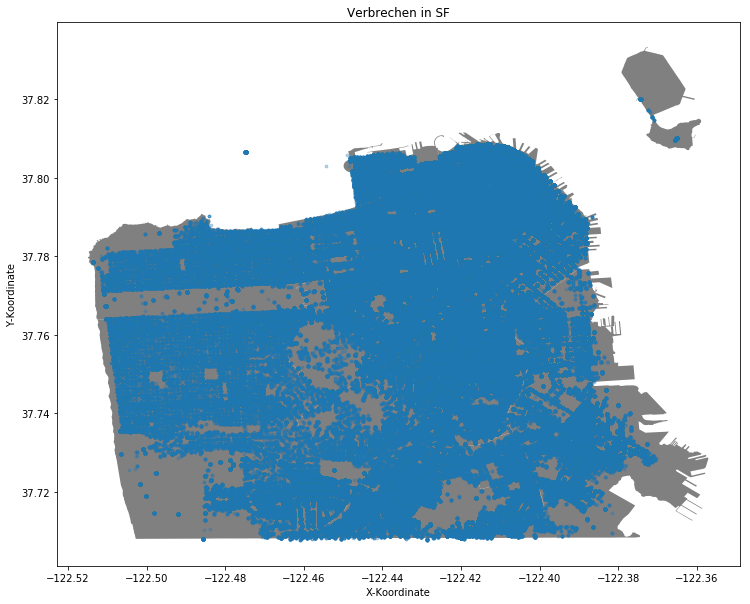

In [16]:
#Plot Points on SF-Map
fig, ax = plt.subplots(1, figsize=(13,10))
sf_maping = sf_map.plot(ax=ax, color='gray')
df_data_sf.plot(ax=sf_maping, marker="o", markersize=8, alpha=0.3)
ax.set_title("Verbrechen in SF")
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.savefig('SF_Crime_Map.png')
plt.show()